<a href="https://colab.research.google.com/github/jiayuanteng/Hands_on_ML2/blob/main/5_Support_Vector_Machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Iris dataset


In [1]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC, SVC



# Support Vector Machine (Soft Margin Classifier)






## Support Vector Classification
Soft margin linear SVM classifer objective function

$min_{w, b, \zeta} \frac{1}{2}w^{T}w + C\sum_{i=1}^{m}\zeta^{(i)}$\
subject to $t^{(i)}(w^{T}x^{i} + b)\geq 1 - \zeta^{(i)}$ and $\zeta^{(i)}\geq 0 $ for i = 1, 2, ..., m

$\zeta^{(i)}$ is a slack variable. It measures how much the $i^{th}$ instance is allowed to violate the margin.

In [2]:
iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [3]:
iris['DESCR']

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

In [4]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
# select petal length, petal width in X
# select iris virginica in y

X = iris['data'][:, (2, 3)]
y = (iris['target'] == 2).astype(np.float64)

In [6]:
svm_clf = Pipeline([
                    ("scaler", StandardScaler()),
                    ("linear_svc", LinearSVC(C=1, loss = "hinge")),

])
svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [7]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

In [8]:
# add non-linearity inyo LinearSVC

from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(n_samples = 100, noise = 0.15, random_state=42)
polynomial_svm_clf = Pipeline([
                              ("poly_features", PolynomialFeatures(degree=3)),
                              ("scaler", StandardScaler()),
                              ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42))
])



In [9]:
polynomial_svm_clf.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge', random_state=42))])

In [10]:
poly_kernel_svm_clf = Pipeline([
                                ("scaler", StandardScaler()),
                                ("svm_clf", SVC(C = 5, kernel = "poly", degree = 3, coef0 = 1))

])

poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

## Tackle nonlinearity
1. use polynomial function, e.g., degress = 3: $x+x^{2}+x^{3}$. Can acheive this using LinearSVC
2. add features computed with a similarity function which measures how much each instance resembles a particular landmark. Can achieve this using SVC with a defined kernel function

LinearSVC is less computational complex (time complexity is O(m*n)) than SVC (time complexity is O($m^{2}*n$ or $m^{3}*n$. SVC is perfect for complex small or medium sized training sets (not hundreds of thousands of instances). It scales well with the number of featues, especially with sparse features.  

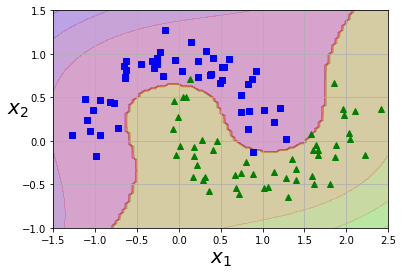

In [11]:
# Plot classifer
import matplotlib.pyplot as plt


def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)



def plot_prediction(clf, axes):
  x0s = np.linspace(axes[0], axes[1], 100)
  x1s = np.linspace(axes[2], axes[3], 100)
  # change x0s to 100 by 100
  x0, x1 = np.meshgrid(x0s, x1s)
  # flatten x0s. shape becoems 1D 10000
  X = np.c_[x0.ravel(), x1.ravel()]
  y_pred = clf.predict(X).reshape(x0.shape)
  y_decision = clf.decision_function(X).reshape(x0.shape)
  plt.contourf(x0, x1, y_pred, cmap = plt.cm.brg, alpha = 0.2)
  plt.contourf(x0, x1, y_decision, cmap = plt.cm.brg, alpha = 0.2)

plot_prediction(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
X, y = make_moons(n_samples = 100, noise = 0.15, random_state=42)
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

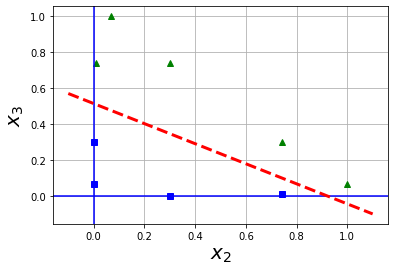

In [12]:
# use Gaussian Radial Basis Function (RBF ) as similarity function
def rbf(x_l, gamma = -0.3):
  return np.exp(gamma*x_l**2)

def similarity_feature(raw_data, x0_2, x0_3, gamma = -0.3):
  x2 = np.exp(gamma*np.abs(raw_data - x0_2)**2)
  x3 = np.exp(gamma*np.abs(raw_data - x0_3)**2)

  return x2, x3

g1 = np.array([-4, -3, 3, 4])
g2 = np.array([-2, -1, 0, 1, 2])

x0_2 = np.array([-2])
x0_3 = np.array([1])


g1_x2, g1_x3 = similarity_feature(g1,x0_2, x0_3)

g2_x2, g2_x3 = similarity_feature(g2,x0_2, x0_3)

plt.grid(True, which='both')
plt.plot(g1_x2, g1_x3, "bs")
plt.plot(g2_x2, g2_x3, "g^")
plt.xlabel(r"$x_2$", fontsize=20)
plt.ylabel(r"$x_3$", fontsize=20)
plt.axhline(y=0, color='b', linestyle='-')
plt.axvline(x=0, color='b', linestyle='-')
plt.plot([-0.1, 1.1], [0.57, -0.1], "r--", linewidth=3)
plt.show()

In [13]:
rbf_kernel_svm_clf = Pipeline([
                               ("scaler", StandardScaler()),
                               ("svm_clf", SVC(kernel = "rbf", gamma = 5, C = 0.001))
                               
])
rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])


$γ$ is a regulation parameter. When $γ$ is large, bell curve is narrow. Each instance has a small influence. Decision boundary is wangling. When $γ$ is small, bell curve is wide. Decision boundary is smooth. Large $\gamma$ $\rightarrow$ overfitting

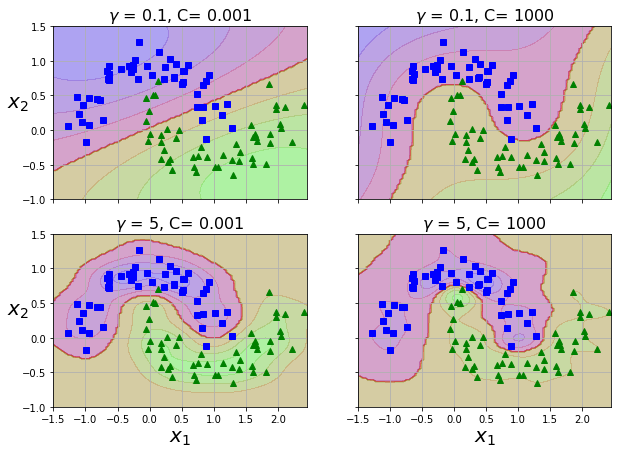

In [14]:
gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []

for gamma, C in hyperparams:
  rbf_kernel_svm_clf = Pipeline([
       ("scaler", StandardScaler()),
       ("svm_clf", SVC(kernel = 'rbf', gamma = gamma, C = C))
      ]
  )
  rbf_kernel_svm_clf.fit(X, y)
  svm_clfs.append(rbf_kernel_svm_clf)


fig, axes = plt.subplots(2, 2, figsize = (10, 7), sharex= True, sharey=True)

for i, svm_clf in enumerate(svm_clfs):
  plt.sca(axes[i//2, i%2])
  plot_prediction(svm_clf, [-1.5, 2.45, -1, 1.5])
  plot_dataset(X, y, [-1.5, 2.45, -1, 1.5])
  gamma, C = hyperparams[i]
  plt.title(r"$\gamma$ = {}, C= {}".format(gamma, C), fontsize = 16)

  if i in (0, 1):
    plt.xlabel("")
  if i in (1, 3):
    plt.ylabel("")

plt.show()


##Support Vector Regression
Objective is different from Support Vector Classification. 

SVM Regression tries to fit as many instances as possible on the street (on the hyperplan) while limiting margin violations (instances off the street). The width of the street is controlled by a hyperparameter, $ϵ$

In [15]:
from sklearn.svm import LinearSVR
svm_reg = LinearSVR(epsilon = 1.5)
svm_reg.fit(X, y)

LinearSVR(epsilon=1.5)

In [16]:
np.random.seed(42)
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3*X + np.random.randn(m, 1)).ravel()


In [17]:
svm_reg1 = LinearSVR(epsilon=1.5, random_state = 42)
svm_reg2 = LinearSVR(epsilon=0.5, random_state = 42)
svm_reg1.fit(X, y)
svm_reg2.fit(X, y)

# find which points are off the street. 
def find_support_vectors(svm_reg, X, y):
  y_pred = svm_reg.predict(X)
  off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon)
  return np.argwhere(off_margin)

svm_reg1.support_ = find_support_vectors(svm_reg1, X, y)
svm_reg2.support_ = find_support_vectors(svm_reg2, X, y)

eps_x1 = 1
eps_y_pred = svm_reg1.predict([[eps_x1]])

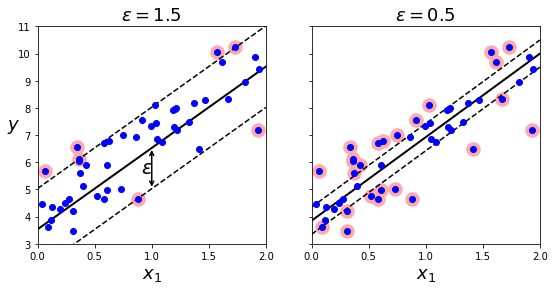

In [18]:
def plot_svm_regression(svm_reg, X, y, axes):
  xls = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
  y_pred = svm_reg.predict(xls)
  plt.plot(xls, y_pred, "k-", linewidth = 2, label = r"$\hat{y}$")
  plt.plot(xls, y_pred + svm_reg.epsilon, "k--")
  plt.plot(xls, y_pred - svm_reg.epsilon, "k--")
  plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s= 180, facecolors = "#FFAAAA")
  plt.plot(X, y, "bo")
  plt.xlabel(r"$x_1$", fontsize = 18)
  plt.axis(axes)

fig, axes = plt.subplots(1, 2, figsize = (9, 4), sharey = True)
plt.sca(axes[0])
plot_svm_regression(svm_reg1, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg1.epsilon), fontsize = 18)
plt.ylabel(r"$y$", fontsize = 18, rotation = 0)

plt.annotate(
        '', xy=(eps_x1, eps_y_pred), xycoords='data',
        xytext=(eps_x1, eps_y_pred - svm_reg1.epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
    )
plt.text(0.91, 5.6, r"$\epsilon$", fontsize=20)
plt.sca(axes[1])
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg2.epsilon), fontsize=18)
plt.show()


In [19]:
# Polynominal function
from sklearn.svm import SVR
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel()

In [20]:
svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="scale")
svm_poly_reg.fit(X, y)

SVR(C=100, degree=2, kernel='poly')

Text(0.5, 1.0, '$degree=2, C=0.01, \\epsilon = 0.1$')

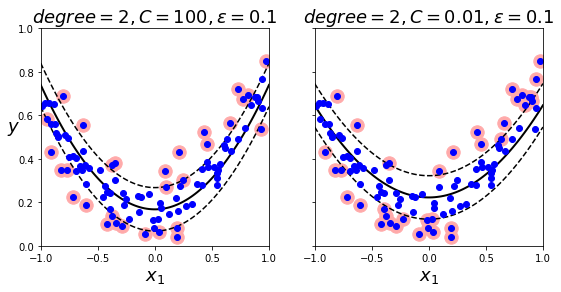

In [21]:
# The strength of the regularization C is inversely proportional to the cost parameter in loss function C
svm_poly_reg1 = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="scale")
svm_poly_reg2 = SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1, gamma="scale")
svm_poly_reg1.fit(X, y)
svm_poly_reg2.fit(X, y)

fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_poly_reg1, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg1.degree, svm_poly_reg1.C, svm_poly_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
plt.sca(axes[1])
plot_svm_regression(svm_poly_reg2, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg2.degree, svm_poly_reg2.C, svm_poly_reg2.epsilon), fontsize=18)


# Heart Disease dataset
From Chapter 9.3.3 (pg 383) in Introduction to Statistical Learning 2nd Edition

In [22]:
import pandas as pd
heart = pd.read_csv("/content/drive/MyDrive/data/Heart.csv")

In [23]:
heart = heart.drop("Unnamed: 0", axis = 1)

In [24]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        303 non-null    int64  
 1   Sex        303 non-null    int64  
 2   ChestPain  303 non-null    object 
 3   RestBP     303 non-null    int64  
 4   Chol       303 non-null    int64  
 5   Fbs        303 non-null    int64  
 6   RestECG    303 non-null    int64  
 7   MaxHR      303 non-null    int64  
 8   ExAng      303 non-null    int64  
 9   Oldpeak    303 non-null    float64
 10  Slope      303 non-null    int64  
 11  Ca         299 non-null    float64
 12  Thal       301 non-null    object 
 13  AHD        303 non-null    object 
dtypes: float64(2), int64(9), object(3)
memory usage: 33.3+ KB


In [25]:
heart = heart.dropna()

In [26]:
from sklearn.preprocessing import OneHotEncoder


# def code_dummies(df):
#   return pd.get_dummies(df)


heart = pd.get_dummies(heart)
heart = heart.drop(['ChestPain_typical', 'Thal_normal', 'AHD_No'], axis = 1)

In [27]:
heart.columns

Index(['Age', 'Sex', 'RestBP', 'Chol', 'Fbs', 'RestECG', 'MaxHR', 'ExAng',
       'Oldpeak', 'Slope', 'Ca', 'ChestPain_asymptomatic',
       'ChestPain_nonanginal', 'ChestPain_nontypical', 'Thal_fixed',
       'Thal_reversable', 'AHD_Yes'],
      dtype='object')

In [28]:
heart.describe()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,ChestPain_asymptomatic,ChestPain_nonanginal,ChestPain_nontypical,Thal_fixed,Thal_reversable,AHD_Yes
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,0.478114,0.279461,0.164983,0.060606,0.387205,0.461279
std,9.049736,0.468500,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.500364,0.449492,0.371792,0.239009,0.487933,0.499340
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


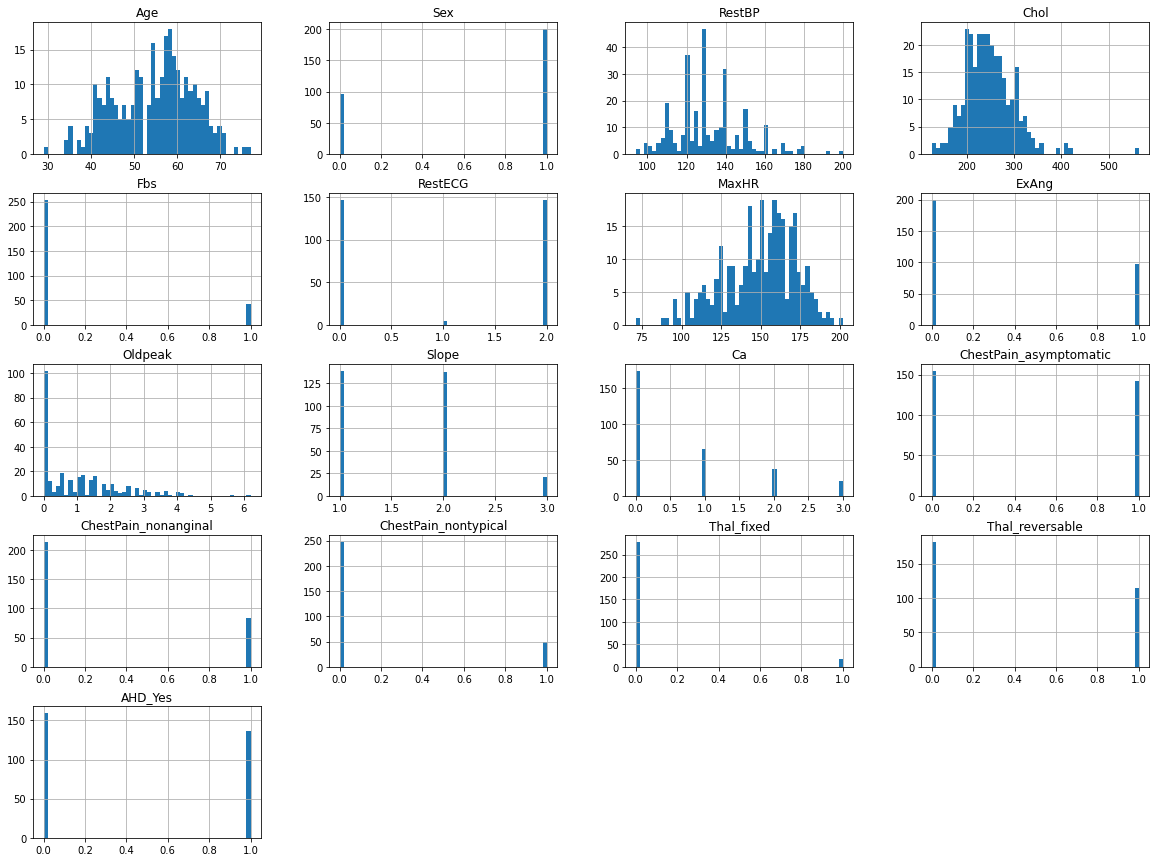

In [29]:
heart.hist(bins = 50, figsize = (20, 15))
plt.show()

In [37]:
# split test and train
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(heart, test_size = 0.3, 
                                       train_size = 0.7, random_state = 42)

heart_num = train_set[['Age', "RestBP", "Chol", "MaxHR", "Oldpeak"]]

num_pipeline = Pipeline([
                         ("std_scaler", StandardScaler())]
)

heart_num = num_pipeline.fit_transform(heart_num)

heart_cat = train_set[['ChestPain_asymptomatic',
       'ChestPain_nonanginal', 'ChestPain_nontypical', 'Thal_fixed',
       'Thal_reversable']]
y_train = train_set[ 'AHD_Yes']
y_test =  test_set[ 'AHD_Yes']

X_train = np.c_[heart_num, np.array(heart_cat)]


In [44]:
# train model with linear model, linear svm, svm with a radial basis kernel. 

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import LinearSVC

clf = []

linear_clf = LinearDiscriminantAnalysis()
linear_clf.fit(X_train, y_train)

clf.append(linear_clf)

linear_svc_clf = LinearSVC(C = 1, loss = "hinge", random_state = 42)
linear_svc_clf.fit(X_train, y_train)

clf.append(linear_svc_clf)

linear_svc_clf = LinearSVC(C = 1, loss = "hinge", random_state = 42)
linear_svc_clf.fit(X_train, y_train)

clf.append(linear_svc_clf)

for gamma in [0.001, 0.01, 0.1]:
  rbf_kernel_svc_clf = SVC(kernel = "rbf", gamma = gamma, C = 1)
  rbf_kernel_svc_clf.fit(X_train, y_train)
  clf.append(rbf_kernel_svc_clf)




In [54]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict

fpr_col = []
tpr_col = []

def plot_roc_curve(fpr, tpr, label):
  plt.plot(fpr, tpr, linewidth = 2, label = label)
  plt.plot([0,1], [0,1], "k--")
  plt.legend()
  plt.xlabel("False Positive Rate")
  plt.ylabel("Recall")


for md in clf:
  y_scores = cross_val_predict(md, X_train, y_train, 
                              cv = 3, method = "decision_function")
  
  fpr, tpr, thresholds = roc_curve(y_train, y_scores)
  fpr_col.append(fpr)
  tpr_col.append(tpr)



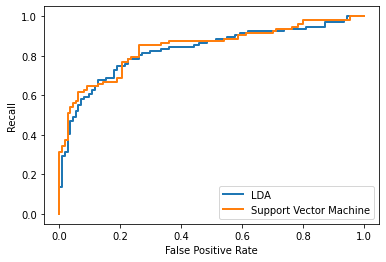

In [53]:
plot_roc_curve(fpr_col[0], tpr_col[0], label = 'LDA')
plot_roc_curve(fpr_col[1], tpr_col[1], label = 'Support Vector Machine')

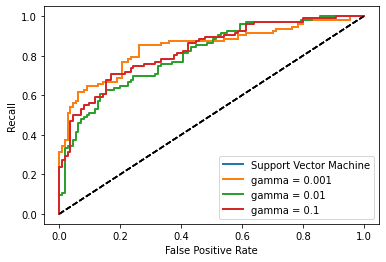

In [55]:
plot_roc_curve(fpr_col[1], tpr_col[1], label = 'Support Vector Machine')
plot_roc_curve(fpr_col[2], tpr_col[2], label = 'gamma = 0.001')
plot_roc_curve(fpr_col[3], tpr_col[3], label = 'gamma = 0.01')
plot_roc_curve(fpr_col[4], tpr_col[4], label = 'gamma = 0.1')
